In [17]:
# Import necessary libraries
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [19]:
# Define the base path of your dataset
base_path = r"C:\Users\mrspe\OneDrive\Bureau\Kidney Project IA\archive\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"

# List the folders inside the dataset to confirm
print("Folders inside dataset:")
print(os.listdir(base_path))

# Define the classes
classes = ["Cyst", "Normal", "Stone", "Tumor"]

# Count number of images per class
for cls in classes:
    folder = os.path.join(base_path, cls)
    print(f"{cls}: {len(os.listdir(folder))} images")


Folders inside dataset:
['Cyst', 'Normal', 'Stone', 'Tumor']
Cyst: 3709 images
Normal: 5077 images
Stone: 1377 images
Tumor: 2283 images


In [21]:
# Loop through all classes and remove any corrupted images
for cls in classes:
    folder = os.path.join(base_path, cls)
    
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        try:
            img = Image.open(file_path)
            img.verify()  # Verify image is valid
        except:
            print("Removing corrupted:", file)
            os.remove(file_path)

print("Cleaning completed ✅")

Cleaning completed ✅


In [23]:
# Resize all images to a standard size (224x224)
resize_size = (224, 224)

for cls in classes:
    folder = os.path.join(base_path, cls)
    
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        img = Image.open(file_path).convert("RGB")  # Convert to RGB
        img = img.resize(resize_size)               # Resize
        img.save(file_path)                         # Overwrite image

print("Resizing completed ✅")

Resizing completed ✅


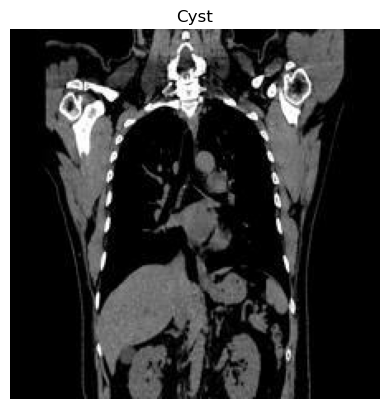

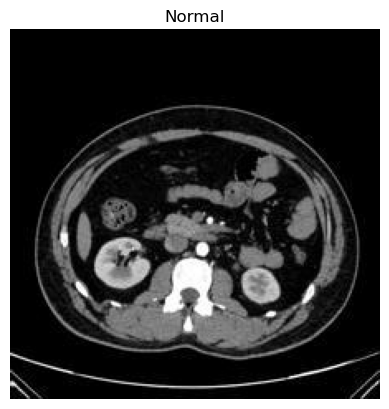

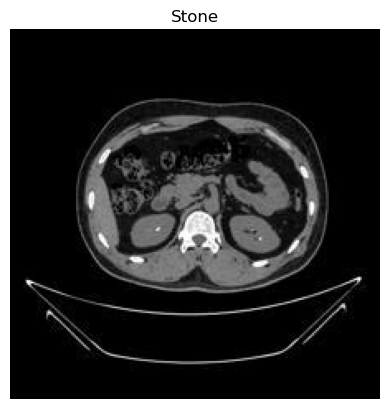

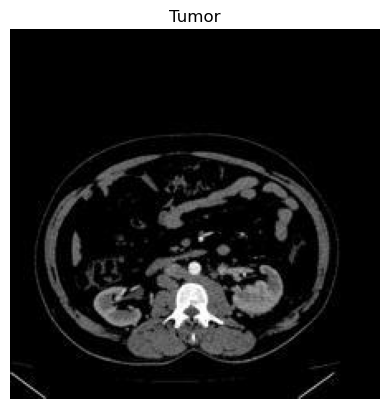

In [25]:
# Randomly pick and display one image per class to verify
for cls in classes:
    folder = os.path.join(base_path, cls)
    sample_image = random.choice(os.listdir(folder))
    img = Image.open(os.path.join(folder, sample_image))
    
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
    plt.show()

In [27]:
# Convert images to flattened arrays for ML / PCA
X = []  # Features
y = []  # Labels

for cls in classes:
    folder = os.path.join(base_path, cls)
    for file in os.listdir(folder):
        img = Image.open(os.path.join(folder, file)).convert("RGB")
        img = img.resize((128,128))  # Resize smaller for PCA speed
        img_array = np.array(img).flatten()  # Flatten image
        X.append(img_array)
        y.append(cls)

X = np.array(X)
y = np.array(y)

print("Shape of X:", X.shape)
print("Number of labels:", len(y))


Shape of X: (12446, 49152)
Number of labels: 12446


In [29]:
# Encode class names into numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Classes encoded:", le.classes_)

Classes encoded: ['Cyst' 'Normal' 'Stone' 'Tumor']


In [31]:
# Reduce dimensionality with PCA
pca = PCA(n_components=50)  # Keep top 50 components
X_pca = pca.fit_transform(X)

print("Shape after PCA:", X_pca.shape)
print("Variance explained:", sum(pca.explained_variance_ratio_))

Shape after PCA: (12446, 50)
Variance explained: 0.7120865573066616


In [33]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

        Cyst       1.00      1.00      1.00       765
      Normal       1.00      1.00      1.00      1015
       Stone       1.00      1.00      1.00       276
       Tumor       1.00      1.00      1.00       434

    accuracy                           1.00      2490
   macro avg       1.00      1.00      1.00      2490
weighted avg       1.00      1.00      1.00      2490



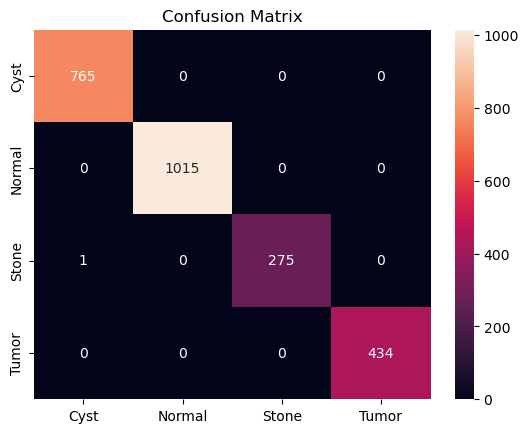

In [35]:
# Train a Random Forest classifier as baseline
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.show()

Classification Report:
              precision    recall  f1-score   support

        Cyst       1.00      1.00      1.00       765
      Normal       1.00      1.00      1.00      1015
       Stone       1.00      1.00      1.00       276
       Tumor       1.00      1.00      1.00       434

    accuracy                           1.00      2490
   macro avg       1.00      1.00      1.00      2490
weighted avg       1.00      1.00      1.00      2490



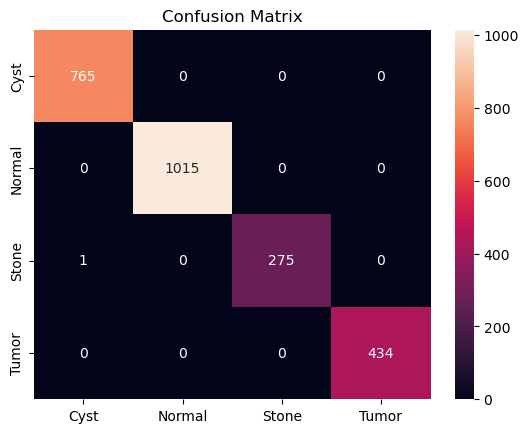

In [40]:
#Step 10 — Classification using RandomForest + PCA (working)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the PCA-transformed data (X_pca from previous steps)
# Encode labels if not done yet
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Train RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.show()


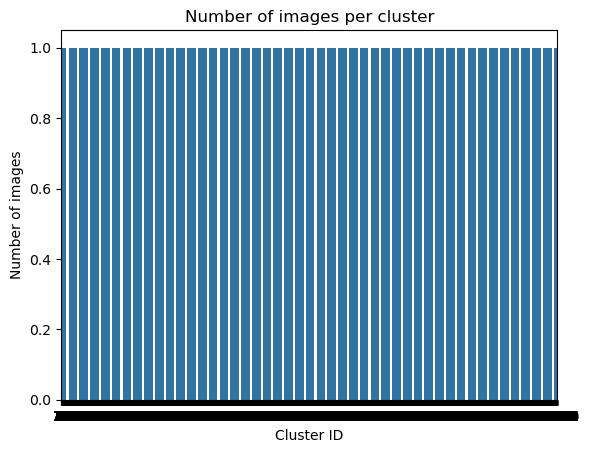

In [42]:
#Step 11 — Clustering / Segmentation
from sklearn.cluster import KMeans

# KMeans on PCA features
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize cluster distribution
sns.countplot(clusters)
plt.title("Number of images per cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Number of images")
plt.show()

In [44]:
#Step 12 — Recommendation Engine
# Map classes to recommendations
recommendation_map = {
    'Normal': "Suivi de routine",
    'Cyst': "Suivi périodique + échographie",
    'Tumor': "Consultation urgente + biopsie",
    'Stone': "Analgésie + traitement des calculs"
}

# Predict a random sample from test set
import random
idx = random.randint(0, len(X_test)-1)
sample_pred = rf_model.predict([X_test[idx]])
sample_class = le.inverse_transform(sample_pred)[0]

print("Predicted class:", sample_class)
print("Recommendation:", recommendation_map[sample_class])


Predicted class: Stone
Recommendation: Analgésie + traitement des calculs
